In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn as sk
import copy
import seaborn as sns


print("Pandas: ", pd.__version__)
print("Numpy: ", np.__version__)
print("Sklearn: ", sk.__version__)

Pandas:  1.4.4
Numpy:  1.21.5
Sklearn:  1.0.2


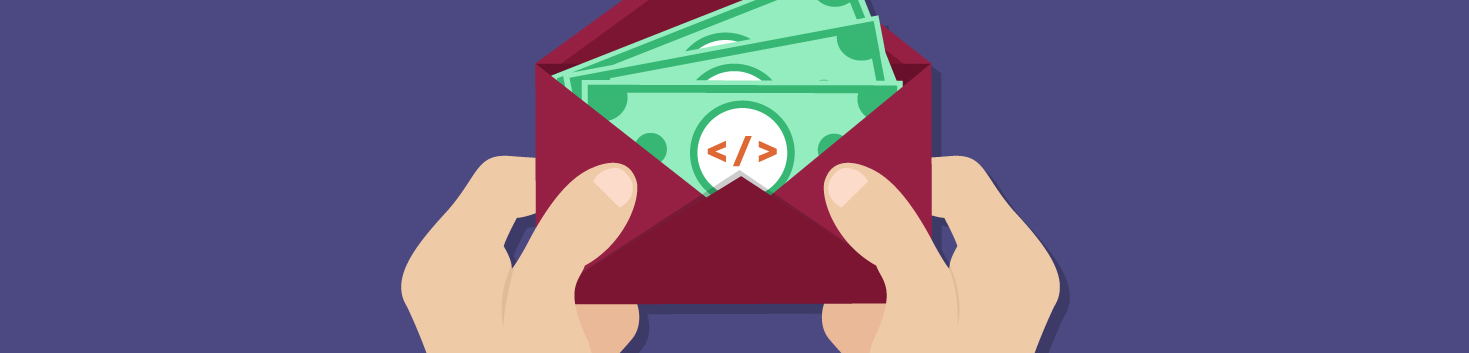

# Classify salaries of Adult people in two categories, <$\$$50,000 and >$\$$50,000 per annum
- The main aim of this notebook is to analyse the data of an adult person with given certain attributes, and also make a model to classify the salary of the person in two parts as given above.
- Many attributes has been recorded like- age, education, sex, occupation, etc. out of all these we will try to find out which attibutes are good predictors of salary and which have little to no bearing on the salary of the person.

# Evidence of sexism in the US workforce?? Answering with DATA

## The dataset has the following attributes as some of its columns:
- **age:**
- **workclass:**
- **fnlwgt:**
- **education:**
- **marital-status:**
- **occupation:**
- **relationship:**
- **race:**
- **sex:**
- **hours-per-week:**
- **native-country:**

### Loading Test and Train data

In [200]:
df= pd.read_csv("adult.data")
df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [201]:
print(f"Train shape: {df.shape}")

Train shape: (32560, 15)


In [202]:
columns_df=["Age","Workclass","fnlwgt","Education","Education_Num","Marital_Status","Occupation","Relationship","Race","Sex","Capital_Gain","Capital_Loss","Hours_Per_Week","Native_Country","<=50K"]
len(columns_df)
df.columns=columns_df
print(df.columns)


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       '<=50K'],
      dtype='object')


In [203]:
cat_columns= ["Workclass","Education","Marital_Status","Occupation","Relationship","Race","Sex","Native_Country","<=50K"]
num_columns=[item for item in columns_df if item not in cat_columns]
print(cat_columns)
print(num_columns)


['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country', '<=50K']
['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week']


# Data Cleaning: 
- We can see that there are some data points which has '?' as its entries, it seems like null value.
- We replace '?' as NULL.

In [204]:
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
<=50K             0
dtype: int64

In [205]:
for col in cat_columns:
    print(f"{col}:\n {df[col].unique()}\n")

Workclass:
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Education:
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Marital_Status:
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

Occupation:
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']

Relationship:
 [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Race:
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

Sex:
 [' Male' ' Female']

Native_Country:
 [' United-States' ' Cub

### We don't have many entries with '?' values, we can just delete them and still won't lose a lot of data

In [206]:
print("Number of entries with ' ?' values:\n")
for colm in cat_columns:
    print(colm,"\t:",df[df[colm] == ' ?'].shape)

Number of entries with ' ?' values:

Workclass 	: (1836, 15)
Education 	: (0, 15)
Marital_Status 	: (0, 15)
Occupation 	: (1843, 15)
Relationship 	: (0, 15)
Race 	: (0, 15)
Sex 	: (0, 15)
Native_Country 	: (583, 15)
<=50K 	: (0, 15)


In [207]:
df=df.replace(' ?', value=np.nan)

In [208]:
for colm in cat_columns:
    print(colm,"\t:",df[df[colm] == ' ?'].shape)

Workclass 	: (0, 15)
Education 	: (0, 15)
Marital_Status 	: (0, 15)
Occupation 	: (0, 15)
Relationship 	: (0, 15)
Race 	: (0, 15)
Sex 	: (0, 15)
Native_Country 	: (0, 15)
<=50K 	: (0, 15)


In [209]:
df.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country     583
<=50K                0
dtype: int64

[0.         0.05638821 0.         0.         0.         0.
 0.05660319 0.         0.         0.         0.         0.
 0.         0.01790541 0.        ]


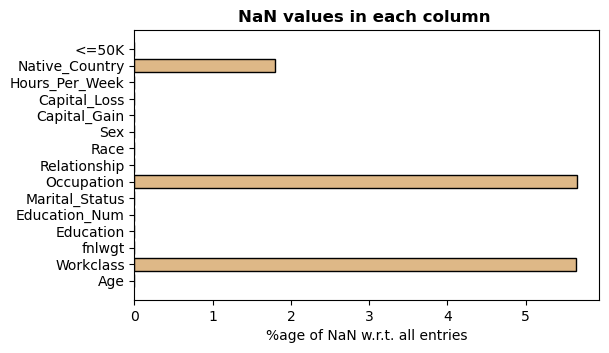

In [210]:
null_colms= []
for i in df.isna().sum():
    null_colms.append(float(i))
    
plt.figure(figsize= (6,3.5))
plt.barh(df.columns, np.array(null_colms)/len(df)*100, color= 'burlywood', edgecolor= 'k')
plt.title("NaN values in each column ", weight= 'bold')
plt.xlabel("%age of NaN w.r.t. all entries")
print(np.array(null_colms)/len(df))

In [211]:
df = df.dropna(how='any',axis=0) 

print("\nTotal %age null values left:")
print(df.isna().sum()/len(df)*100)


Total %age null values left:
Age               0.0
Workclass         0.0
fnlwgt            0.0
Education         0.0
Education_Num     0.0
Marital_Status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Capital_Gain      0.0
Capital_Loss      0.0
Hours_Per_Week    0.0
Native_Country    0.0
<=50K             0.0
dtype: float64


In [212]:
30161/32560

0.9263206388206389

### `Workclass`, `Occupation` and `Native_Country` have Null values 
- `Native_Country` has about 2% of the total data as Null value
- `Workclass` and `Occupation` both have a bit above 5% of the data as Null. I belive both have them have multiple common missing value as both the columns are related.

## After the Null values are deleted, we still retain ~93% of the data.

# -------------------------------------------------------------------------------------------

# Data Analysis

In [213]:
df.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Histogram plots of numerical variables

In [370]:
num_columns # Numerical variables

['Age',
 'fnlwgt',
 'Education_Num',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_Per_Week']

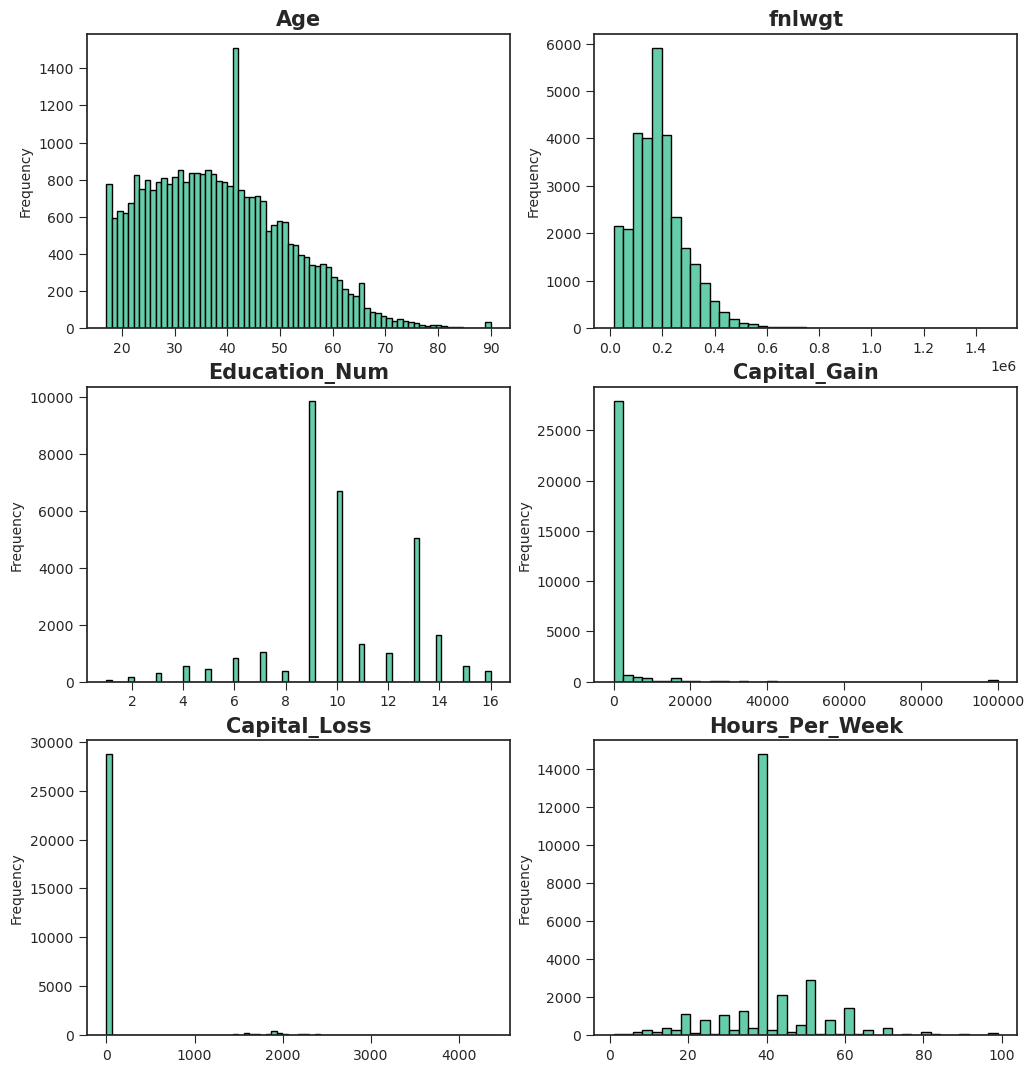

In [214]:
with plt.style.context(('seaborn-ticks')):
    fig, ax = plt.subplots(3,2, figsize= (12,13))
    for i in range(int(len(num_columns)/2)):
        col=num_columns[2*i]
        ax[i][0].hist(df[col],edgecolor= 'k', bins= 70, color= 'mediumaquamarine')
        ax[i][0].set_title(f"{col}", weight= 'bold',size=15)
        ax[i][0].set_ylabel("Frequency")
        
        col=num_columns[2*i+1]
        ax[i][1].hist(df[col],edgecolor= 'k', bins= 40, color= 'mediumaquamarine')
        ax[i][1].set_title(f"{col}", weight= 'bold',size=15)
        ax[i][1].set_ylabel("Frequency")

## Observations:
- `Age` distribution looks is distributed like a gaussian distribution, but since only entries of people above 18 years of age is recorded, it is cut off from below. The mean is $\mu=38$ years of age with a standard deviation of $\sigma=13$ years.
- `fnlwt` is skewed positively and has a mean of around $\mu= 0.2$ and standard deviation $\sigma=0.1$.
- Only $13\%$ of the adults taken from this survey have a not completed High-Scool. And about $55\%$ of them have attended college.
- From `Capital_Gain` and `Capital_Loss` columns we can see that high majority of the people have'nt gained or lost any Capital. Both the graphs are highly skewed towads $0$.
- From `Hours_Per_Week` graph we can observe most of the workers work around $40$ hours a week. Also it according to the the data there are few people (~$80$) who work about 100 hours a week i.e. 14 hours a day (Insane). It would be interesting to see whether they make significantly more than others..
- We can make a new feature `Net_Capital_Diff` wihich is the difference between Capital Gain and Capital Loss.

In [215]:
df.loc[df['Hours_Per_Week']>98].shape

(78, 15)

In [216]:
df.loc[df['Education_Num']>9].shape[0]/df.shape[0]

0.5497165213354995

In [217]:
df.groupby(['Education']).mean()['Education_Num']

Education
 10th             6.0
 11th             7.0
 12th             8.0
 1st-4th          2.0
 5th-6th          3.0
 7th-8th          4.0
 9th              5.0
 Assoc-acdm      12.0
 Assoc-voc       11.0
 Bachelors       13.0
 Doctorate       16.0
 HS-grad          9.0
 Masters         14.0
 Preschool        1.0
 Prof-school     15.0
 Some-college    10.0
Name: Education_Num, dtype: float64

#### The chart above shows the relation between` Education` and `Education_Num`.

#### It is clear that value assigned to `Eduation_Num` is the Education level of the person which has bijective relation with the `Education` column. Which means we can use them alternatively. I think `Eduation_Num` is more useful for our purposes as it assigns higher numerical values to higher level of education.

## Bar plots of categorical variables

In [371]:
cat_columns # Numerical variables

['Workclass',
 'Education',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_Country',
 '<=50K']

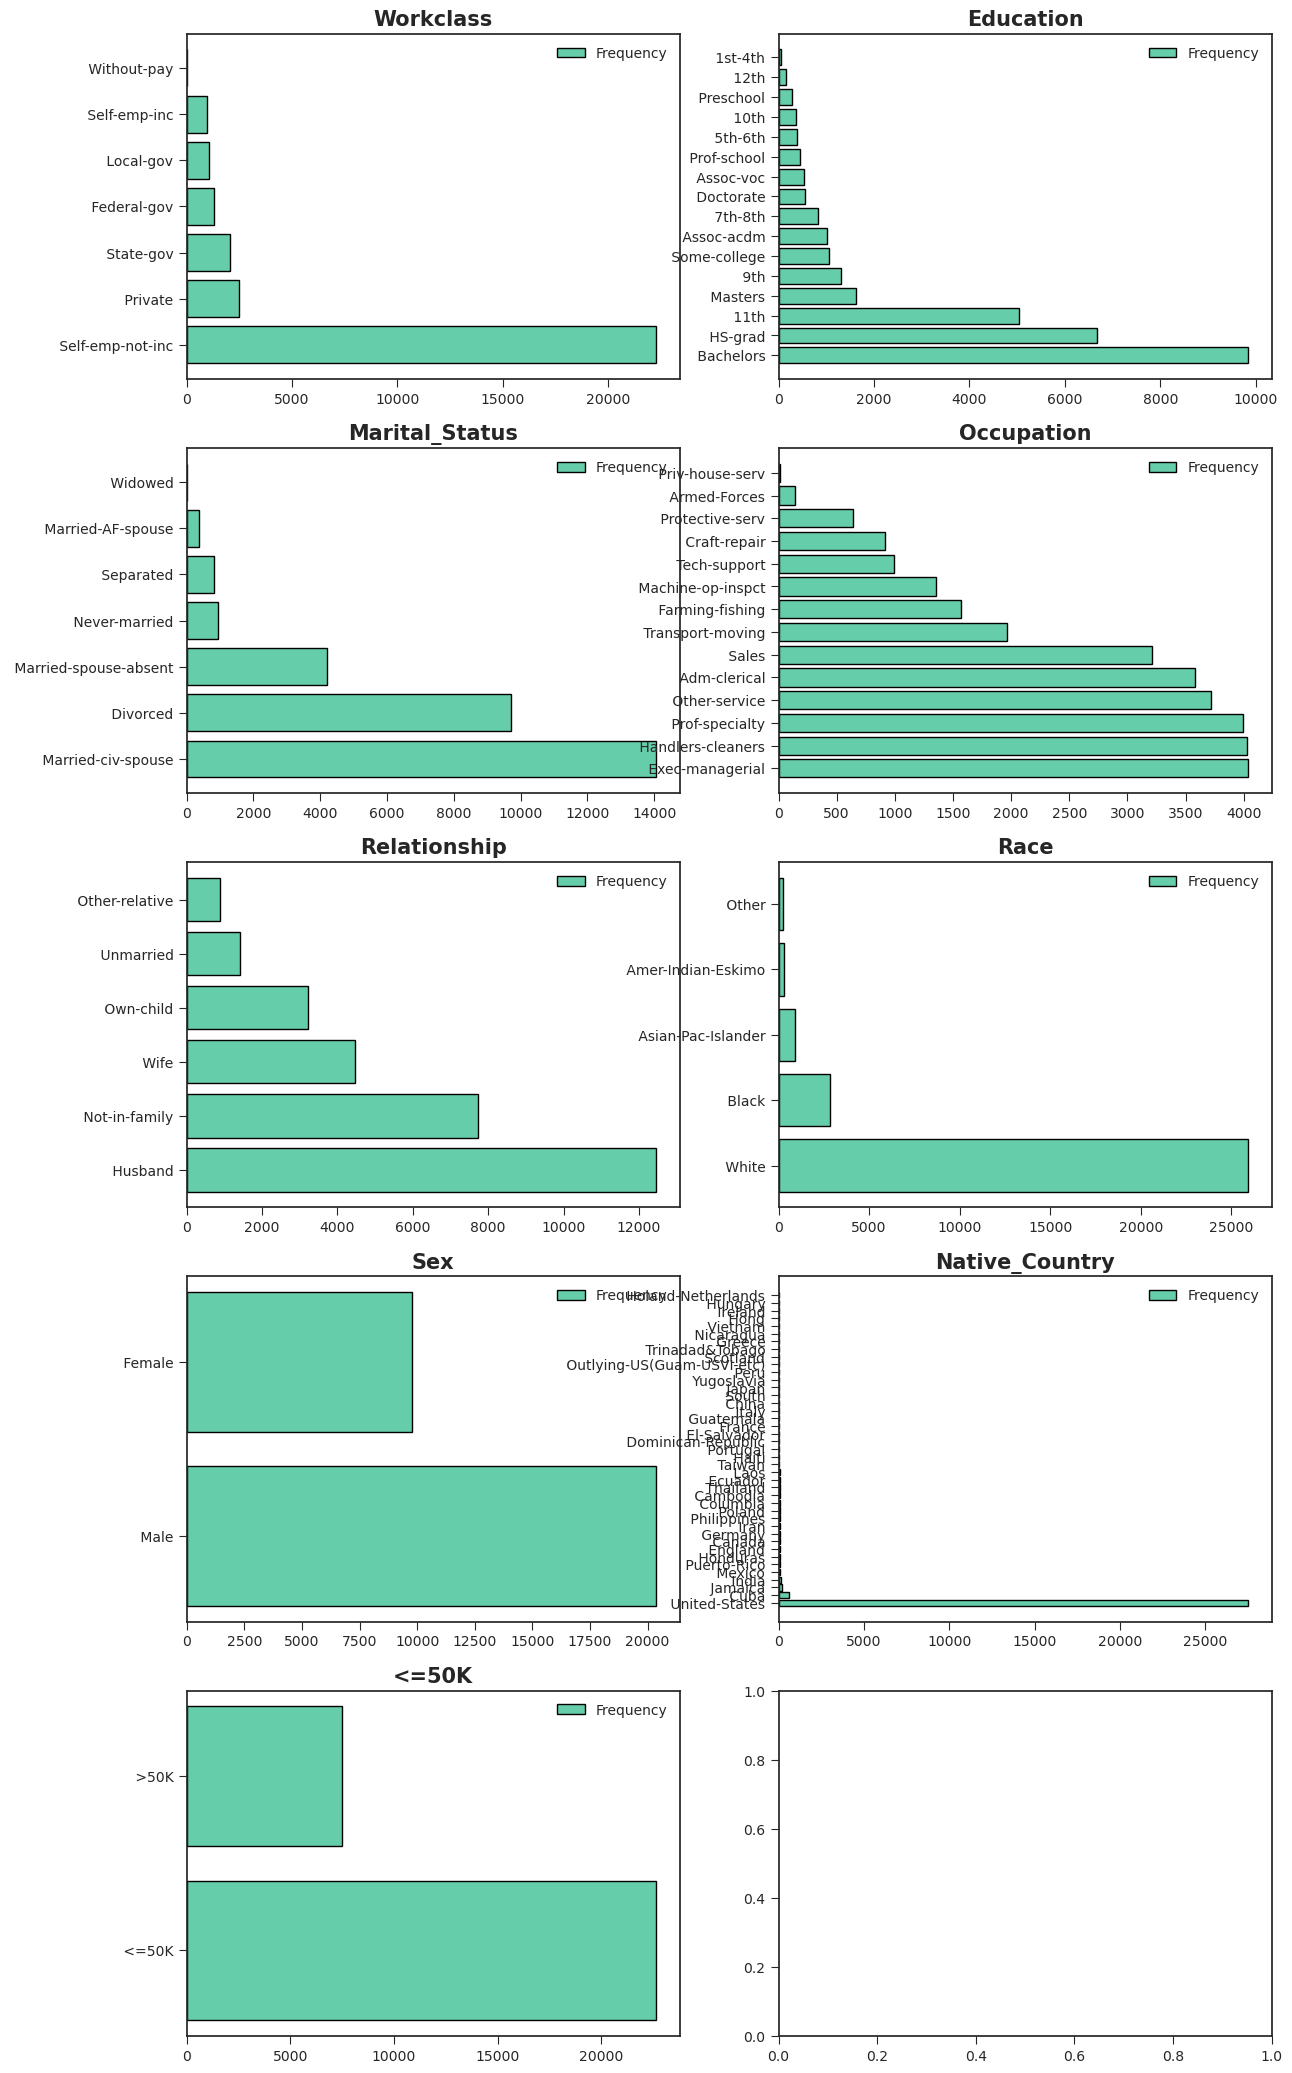

In [197]:
with plt.style.context(('seaborn-ticks')):
    fig, ax = plt.subplots(5,2, figsize= (14,26))
    for i in range(int(len(cat_columns)/2+1)):
        colm=cat_columns[2*i]
        ax[i][0].barh(df[colm].unique(),df[colm].value_counts(), edgecolor='k', label='Frequency', color= 'mediumaquamarine')
        ax[i][0].set_title(f"{colm}", weight= 'bold',size=15)
        ax[i][0].legend()
        
        if (i<4):   
            colm=cat_columns[2*i+1]
            ax[i][1].barh(df[colm].unique(),df[colm].value_counts(), edgecolor='k', label='Frequency', color= 'mediumaquamarine')
            ax[i][1].set_title(f"{colm}", weight= 'bold',size=15)
            ax[i][1].legend()
        

## Observations:
- First prominent thing we notice is that there is an imbalance between the outcomes of the output class. $76\%$ of the people earn $<50$K and only $24\%$ earn more than $50$K. Before doing the modelling we need to balance the `<=50K` column.
- I belive the survey was done in the US as from the `Native_country` column we can see most of the people are native Americans ($>90\%$).
-  There is an imbalance between the sexes too, we can see $1/3$ of the sample population is Female whereas $2/3$ are males. This is not representative of the actual population as we would expect 50-50 split between Males and Females.
- The majority of the sample population is white, it is expected if the survey is done in the US.


In [179]:
df['<=50K'].value_counts()

 <=50K    22653
 >50K      7508
Name: <=50K, dtype: int64

In [183]:
27503/30161

0.9118729485096648

In [180]:
df.shape

(30161, 15)

## From this plot we try to visulaize the correlation between the numerical variables. Along with it we try to see that how is the outputt variable `<=50K` is distrubuted.

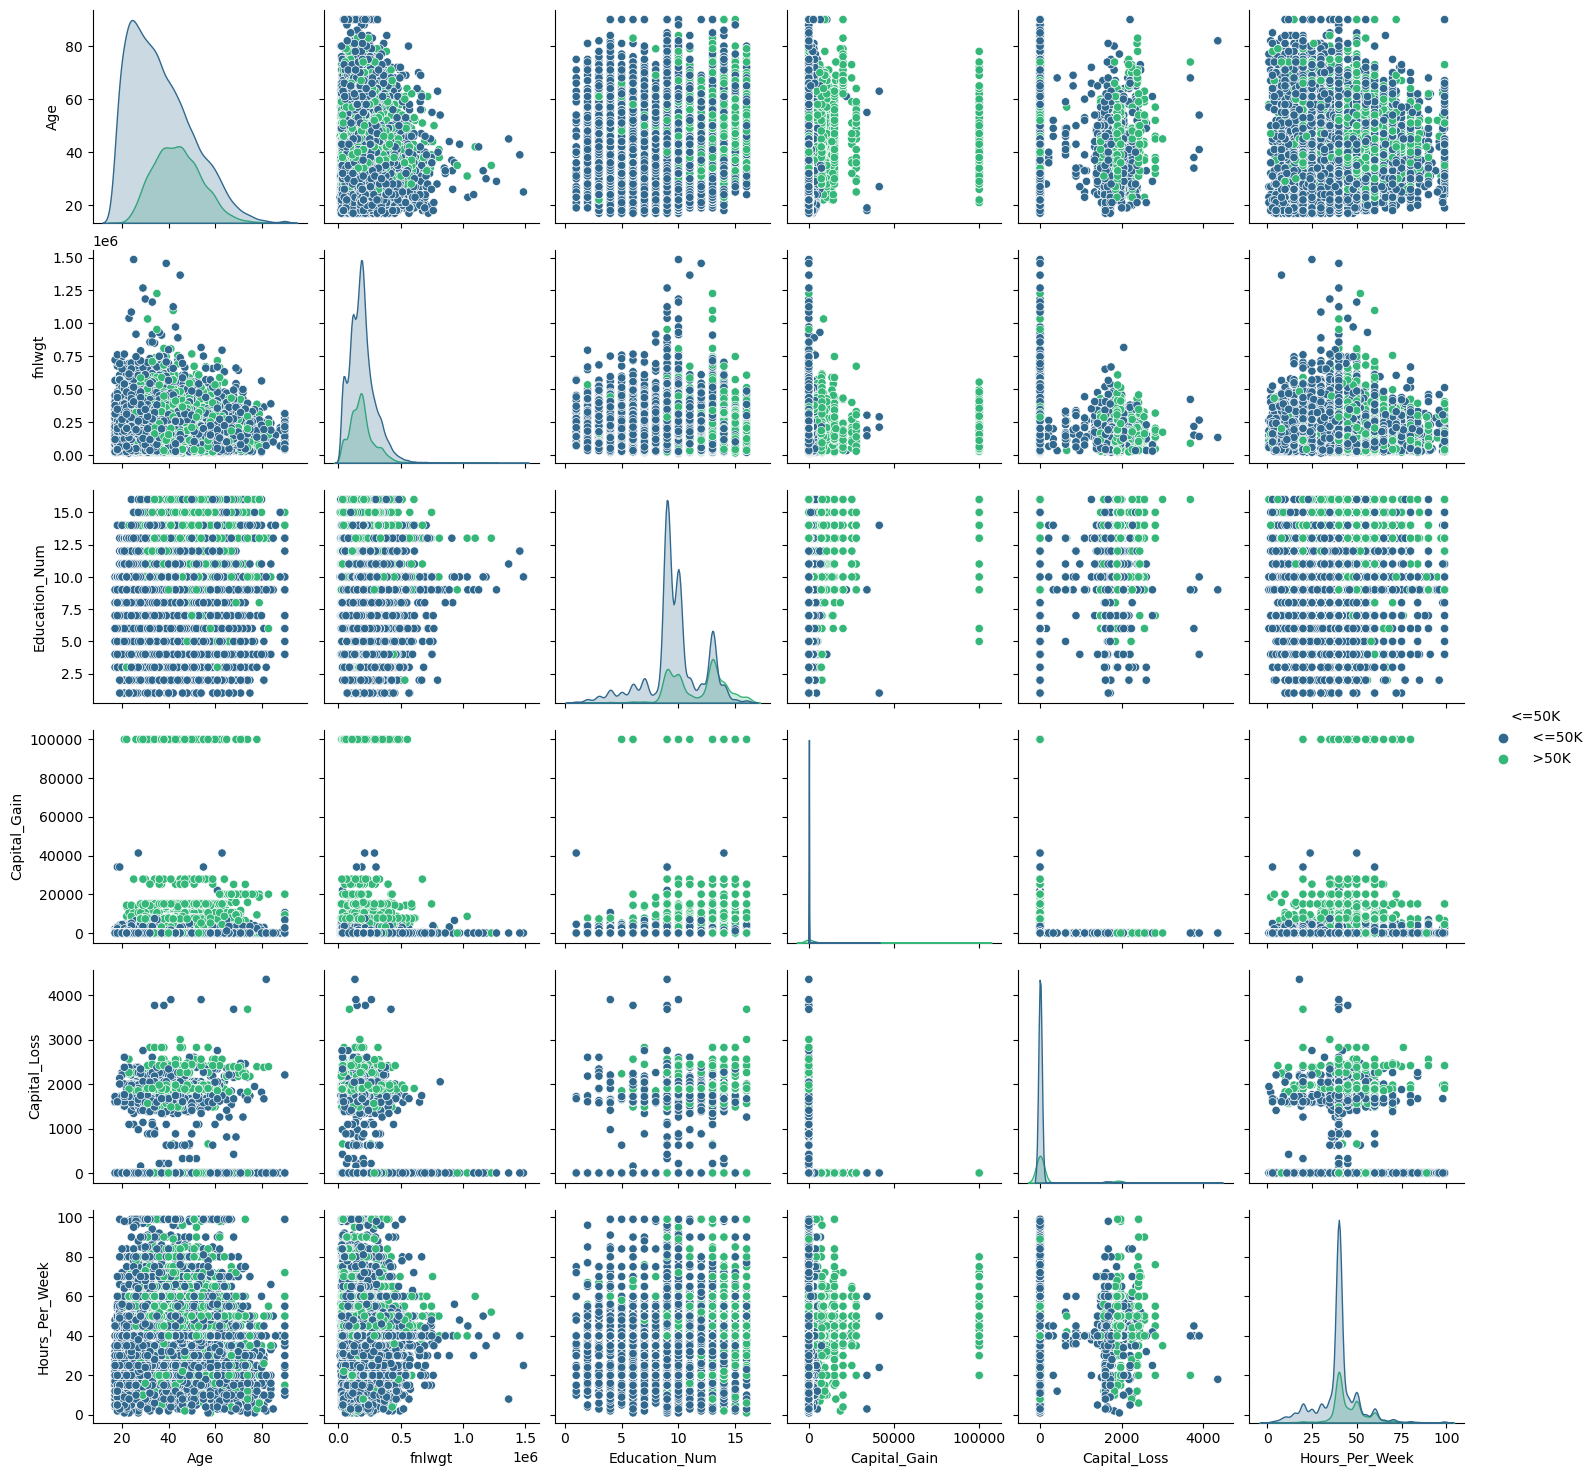

In [198]:
sns.pairplot(df, hue= '<=50K', palette= 'viridis')

Text(0.5, 1.0, 'Correlation Plot')

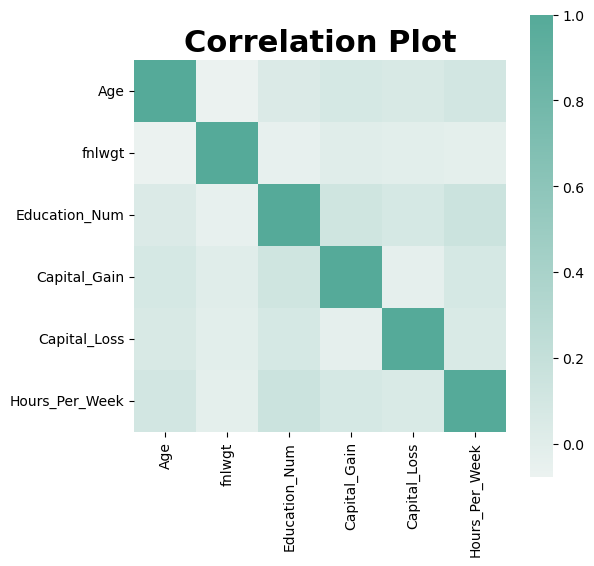

In [192]:
corr= df.corr()
f, ax = plt.subplots(figsize=(6, 6))
cmap= sns.color_palette("light:#5A9", as_cmap=True)
sns.heatmap(corr, square=True, cmap=cmap, vmax=1)
plt.title("Correlation Plot", weight= 'bold', size= 22)

In [196]:
corr

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
Age,1.000000,-0.076511,0.043525,0.080154,0.060166,0.101599
fnlwgt,-0.076511,1.000000,-0.044954,0.000427,-0.009757,-0.022889
Education_Num,0.043525,-0.044954,1.000000,0.124413,0.079656,0.152528
Capital_Gain,0.080154,0.000427,0.124413,1.000000,-0.032228,0.080432
Capital_Loss,0.060166,-0.009757,0.079656,-0.032228,1.000000,0.052417
Hours_Per_Week,0.101599,-0.022889,0.152528,0.080432,0.052417,1.000000


## Observations
- We can see `Capital_Gain` is capped off at $\$100K$, I think it is because the maximum amount you could enter in the survey is that amount and anyone with Capital Gain more than that has been recorded at $\$100K$ only.
- `Capital_Gain`>$0$ implies `Capital_Loss`=$0$ and vice versa.
- Other that that there is no clear correlation between these variables visually. The corrrelation plot confirms this, no two numerical variables have correlation more than $0.2$.

## Seperate Kernel Density plots for entries with $\leq\$50K$ yearly salary and $>\$50K$ yealy salary

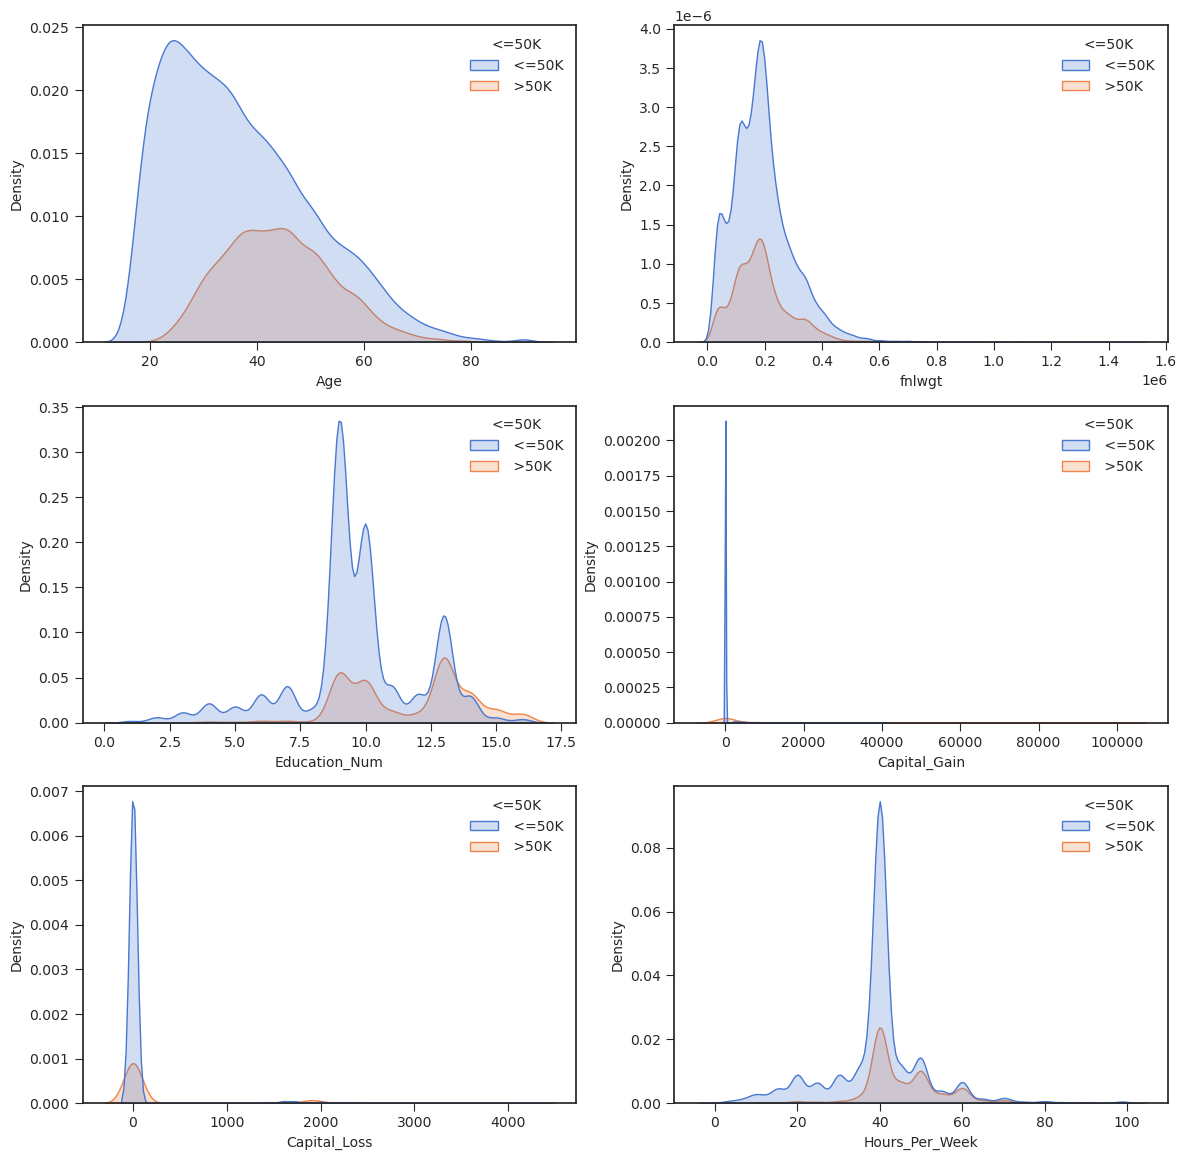

In [312]:
with plt.style.context(('seaborn-ticks')):
    fig, ax = plt.subplots(3,2, figsize= (14,14))
    for i in range(int(len(num_columns)/2)):
        colm=num_columns[2*i]
        sns.kdeplot(df[colm], hue=df['<=50K'], fill=True, ax= ax[i][0], palette="muted")
        
        colm=num_columns[2*i+1]
        sns.kdeplot(df[colm], hue=df['<=50K'], fill=True, ax= ax[i][1], palette="muted")

## Observations
- First thing to notice here is the area of both the curves is not the same. The ratio between the areas with salary $>\$50K$ and $\leq\$50K$ $=0.33$ (The ratio of the shaded orange and blue region). As it is the the ratio between the number of people with greater than $\$50K$ salary and number of people with lesser than $\$50K$ salary.
- From the `Age` plot we can see that the probability of getting a salary greater than $\$50K$ increases as your age increases. This indicates that experience is important determinant for your salary, the more experience you have, higher the chances of you getting a higher salary.
- In the `Education_Num` plot, it is clearly evident higher education level implies higher chances of having a $\$50K+$ salary. For education level above 14 i.e. Masters or higher, the chances of having a salary greater than $\$50K$ salary is more than having a salary lesser than $\$50K$. This shows investing your time and money in education is a worthy investment.
- The probability of having $\$50K+$ salary given you have a minimum Masters Degree is ~$75\%$. Whereas for people with no College Degree, the chances of having $\$50K+$ salary is ~$13\%$. Massive difference.
- The `Hours_Per_Week` plot is also very interesting.. It clearly shows more hours you put in your work, higher the probability of $\$50K+$ salary. Most of the people have fixed working hour at 40 hrs a week (as seen from the histograms above).
- For people working $<40$ hours a week, the probability of having a $\$50K+$ salary is ~$18\%$. Whereas, for people working $<40$ hours a week it is ~$40\%$.
- It is important to note **Correlation doesn't imply causation**. That is, although it his clear that higher nummber of working hours imply higher salary. It is hard to say whether working higher number of hours will lead you to a higher salary OR higher salary posts need you to work higher number of hours. I personally think it might be a combination of both.

In [268]:
df.loc[df['Hours_Per_Week']>40]['<=50K'].value_counts()

 <=50K    5456
 >50K     3741
Name: <=50K, dtype: int64

In [269]:
3741/(3741+5456)

0.4067630749157334

## Bivariate Analysis for categorical variables

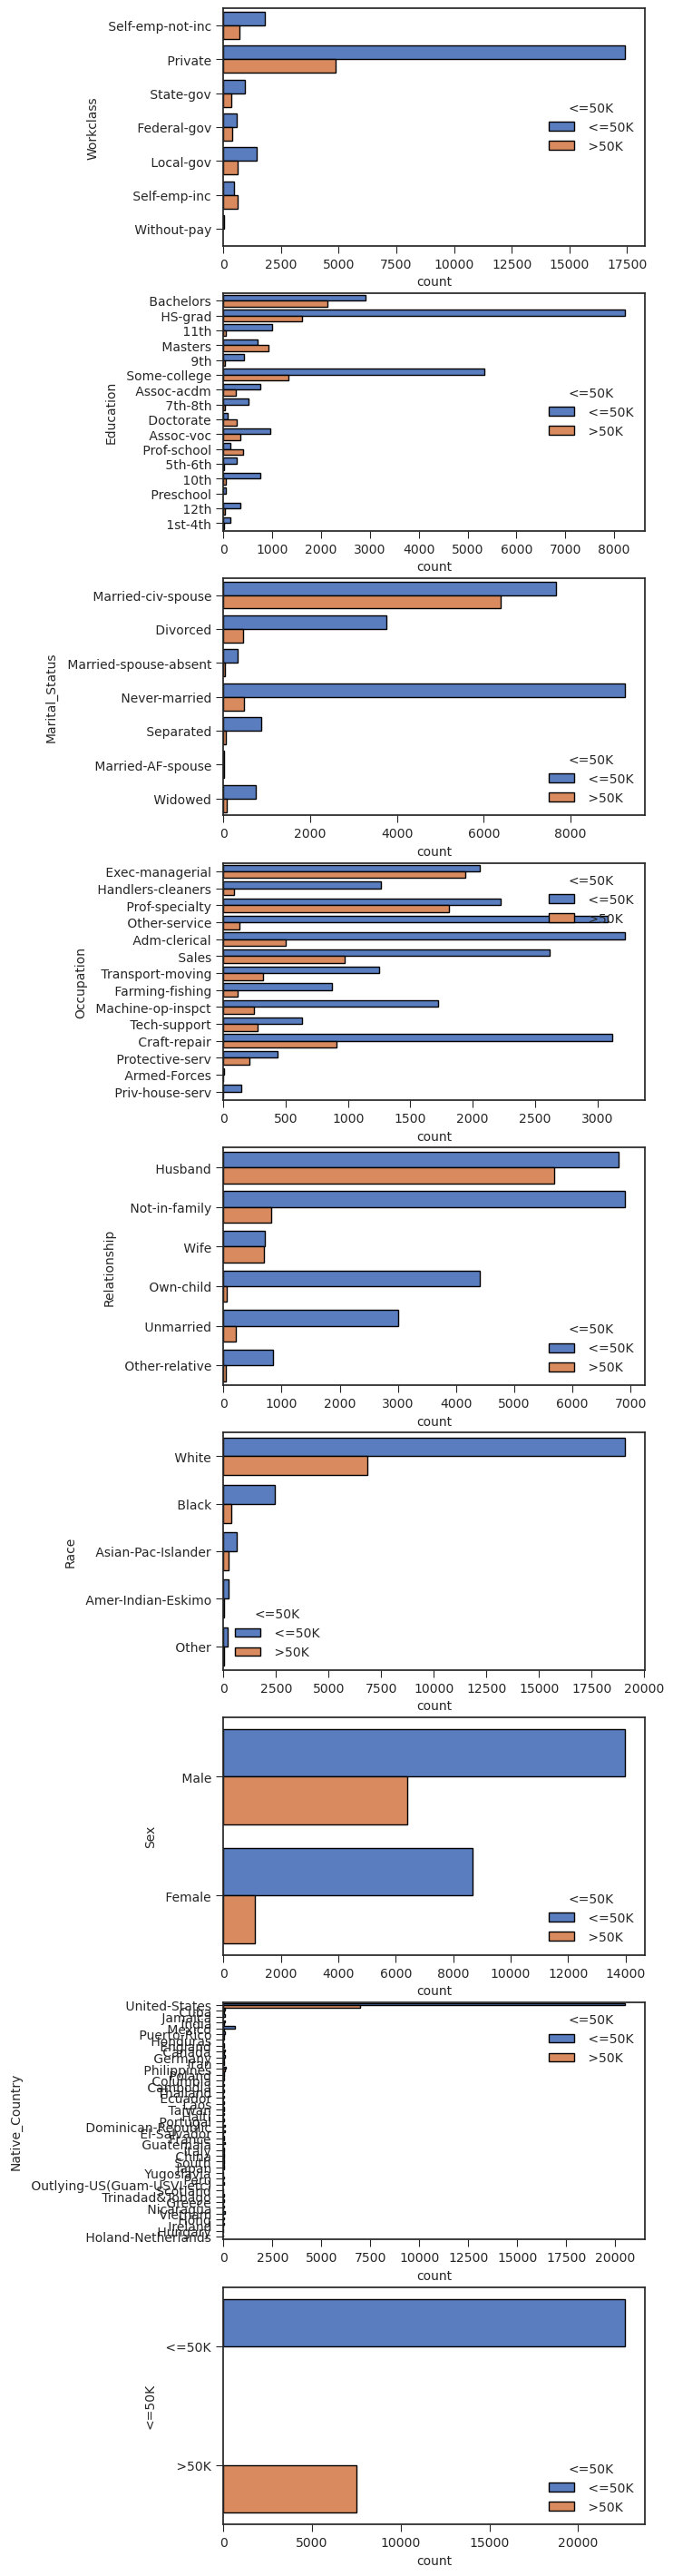

In [326]:
with plt.style.context(('seaborn-ticks')):
    fig, ax = plt.subplots(9,1, figsize= (6,36))
    for i in range(int(len(cat_columns))):
        colm=cat_columns[i]
        g = sns.countplot(y=colm, hue='<=50K', data=df, ax=ax[i], edgecolor='k', palette="muted")

## Observations
- The main observation we would like to make here the `sex` column. From the graph it can be seen that much fewer proportion of the female population has $\$50K+$ salary compared to their male counterpart.
- To be precise ~$11\%$ of the Female population make $\$50K+$ annually whereas ~$31\%$ of the Male population earn more than $\$50K$ annually.
- **Women are being paid lesser than Men, is this evidence for sexism??** Again correlation doesn't imply causation,  to say something conclusive we will have to look into it more.
- Looking into `Relationship` column we see that being 'husband' or 'wife' without having any kids has significantly higher chances of getting $\$50K+$ salary. For husbands it is ~$46\%$ and for wives it is ~$50\%$ (both are significatly higher than popluation average $26\%$).
- If you own a kid the affect on the probability of $\$50K+$ salary is significant. People who own a kid has ~$1.5\%$ probability of having a $\$50K+$ salary. 
- I have no clue why that is the case. I would assume for women it might be the case, as they might not be able to put much effort on work since they have to take care of the child. But I'm not sure why this might be the case for men too..

In [494]:
df.loc[df['Relationship']==' Own-child']['<=50K'].value_counts()

 <=50K    4402
 >50K       64
Name: <=50K, dtype: int64

## Let's try to see whether we can explain the discrepancy of income of Male and Female by looking into the data even furthwr
We will try to do this by diving the dataset into male and female parts and analyse them sepeartly

In [369]:
df_male=df[df['Sex']==' Male']
df_female=df[df['Sex']==' Female']

print(df_male['Sex'].value_counts(),"\n")
print(df_female['Sex'].value_counts(),"\n")

 Male    20379
Name: Sex, dtype: int64 

 Female    9782
Name: Sex, dtype: int64 



In [377]:
df_male.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [376]:
df_female.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
11,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


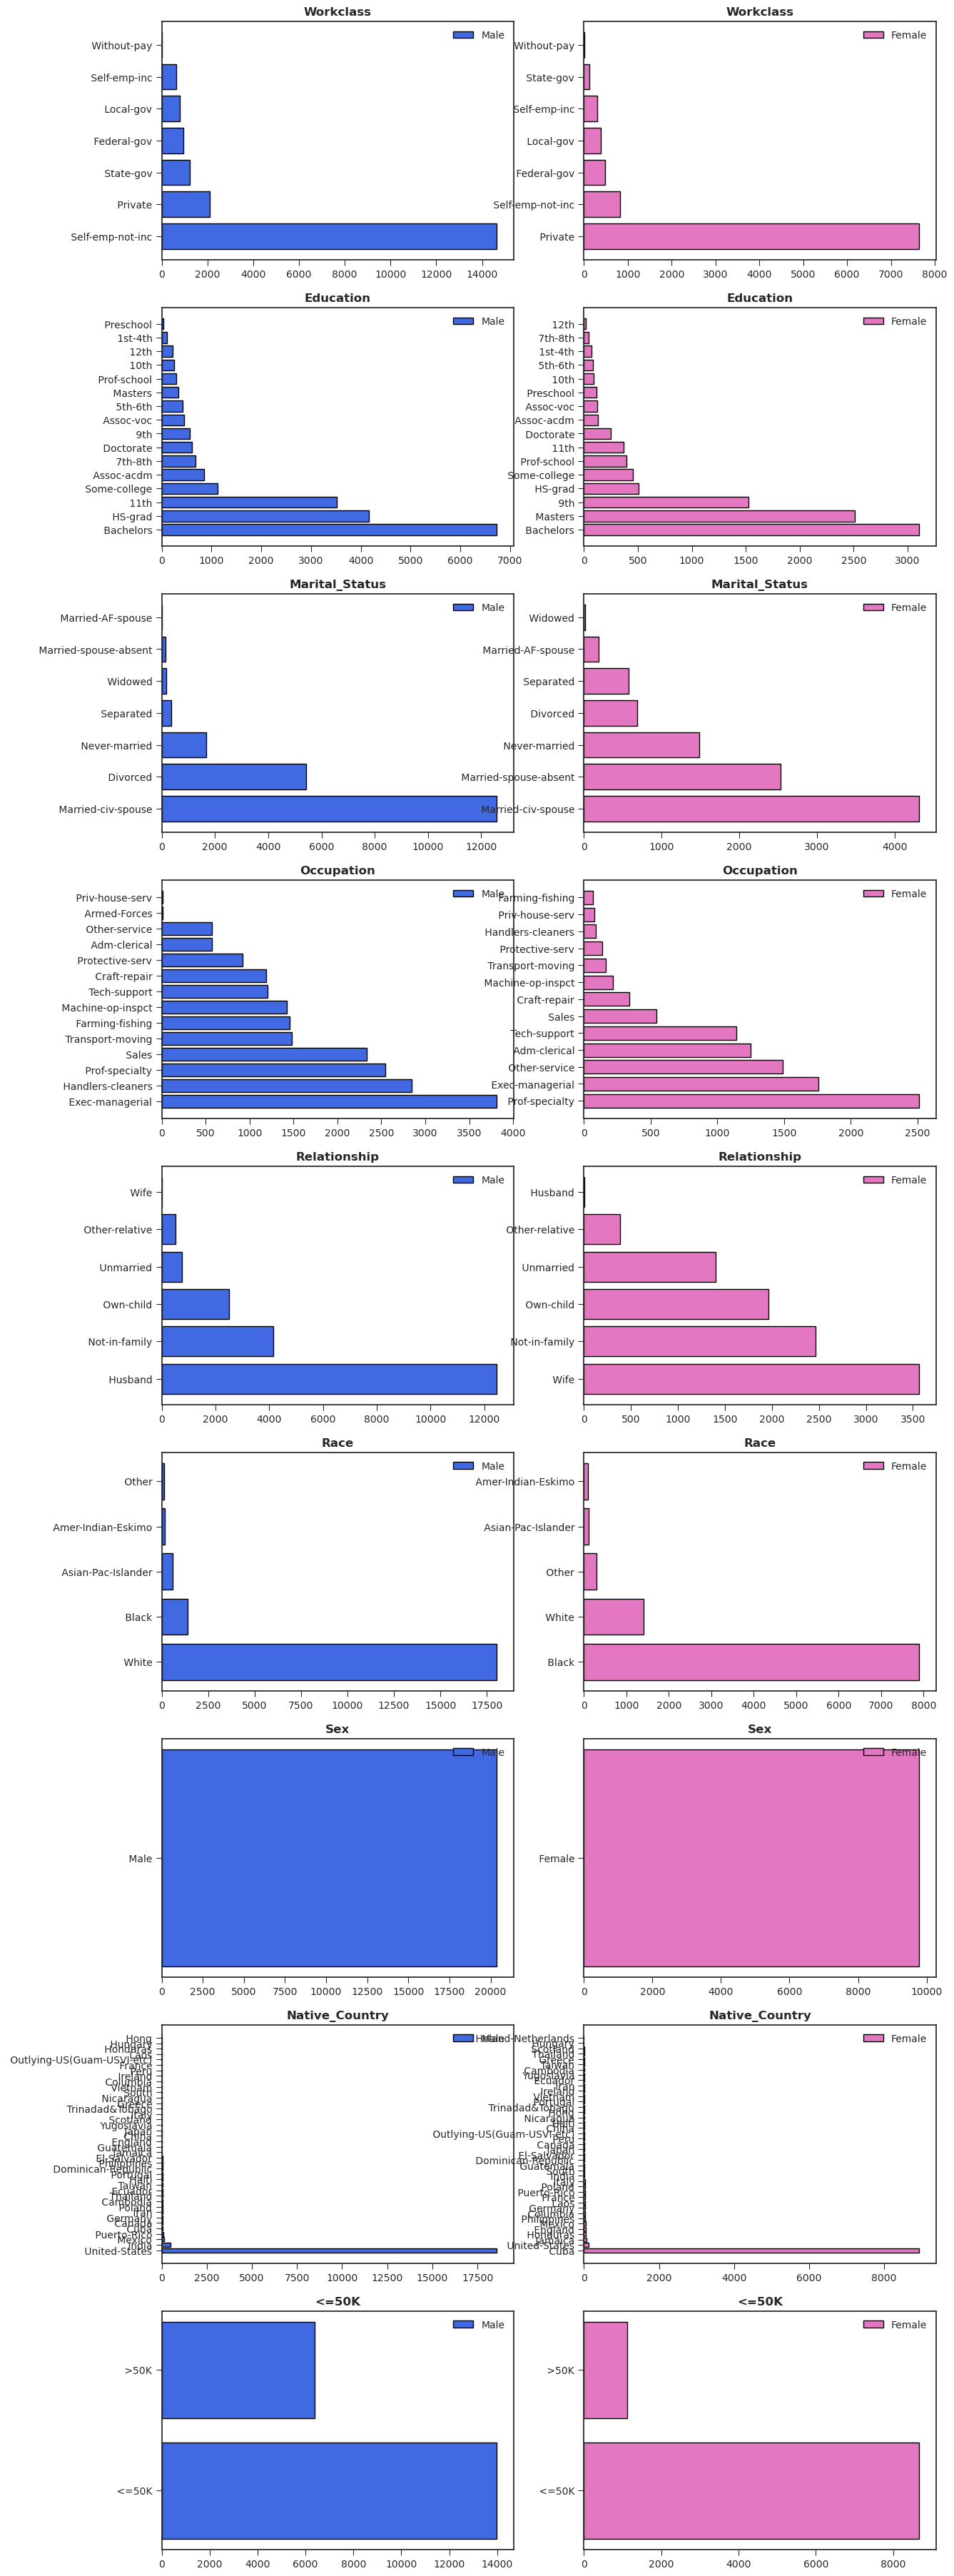

In [398]:
with plt.style.context(('seaborn-ticks')):
    fig, ax = plt.subplots(len(cat_columns),2, figsize= (14,46))
    for i in range(len(cat_columns)):
        colm=cat_columns[i]
        ax[i][0].barh(df_male[colm].unique(),df_male[colm].value_counts(), edgecolor='k', label='Male', color= 'royalblue')
        ax[i][0].legend()
        ax[i][0].set_title(colm,weight='bold')
        
        ax[i][1].barh(df_female[colm].unique(),df_female[colm].value_counts(), edgecolor='k', label='Female', color= 'tab:pink')
        ax[i][1].legend()
        ax[i][1].set_title(colm,weight='bold')
        
    

## Observations
- The first interesting observation is in the last graph- `<=50K`, **we can clearly see that much higher proportion of the male population has $\$50K+$ salary than the women population** (~$31\%$ for men and ~$0.11\%$ for women). What might be the reason for it?
- One of the explainations can be that most men are in occupations which pays higher than the occupations women are in. 

### We look at the entries in the top 4 occupations of Men and Women respectively, and see how many of them earn more than $\$50K$

In [463]:
male_major_occupation= [' Exec-managerial',' Handlers-cleaners',' Prof-specialty',' Sales']
female_major_occupation= [' Prof-specialty',' Exec-managerial',' Other-service',' Adm-clerical']

sad=[' Handlers-cleaners']
print("\nMALE")
for col in male_major_occupation:
    print(col)
    print(df_male.loc[df_male["Occupation"]==col]['<=50K'].value_counts())

print("\nFEMALE")
for col in female_major_occupation:
    print(col)
    print(df_female.loc[df_female["Occupation"]==col]['<=50K'].value_counts())



MALE
 Exec-managerial
 >50K     1660
 <=50K    1189
Name: <=50K, dtype: int64
 Handlers-cleaners
 <=50K    1107
 >50K       79
Name: <=50K, dtype: int64
 Prof-specialty
 >50K     1431
 <=50K    1116
Name: <=50K, dtype: int64
 Sales
 <=50K    1454
 >50K      882
Name: <=50K, dtype: int64

FEMALE
 Prof-specialty
 <=50K    1111
 >50K      380
Name: <=50K, dtype: int64
 Exec-managerial
 <=50K    866
 >50K     277
Name: <=50K, dtype: int64
 Other-service
 <=50K    1709
 >50K       49
Name: <=50K, dtype: int64
 Adm-clerical
 <=50K    2303
 >50K      209
Name: <=50K, dtype: int64


In [465]:
# Propotion of people in the top 4 occupations by men who earn more than $50K per annum
(1660+79+1431+882)/(1660+79+1431+882+ 1189+1116+1454+1107)

0.4543619645660462

In [467]:
# Propotion of people in the top 4 occupations by women earn more than $50K per annum
(380+277+49+209)/(1111+866+1709+2303)

0.1527800968442144

In [492]:
# The top earning columns
top_earning_occuptn=[' Exec-managerial',' Prof-specialty',' Sales',' Craft-repair']
colummn=[' Adm-clerical']

for col in top_earning_occuptn:
    print(df.loc[df['Occupation']==col]['Sex'].value_counts())

 Male      2849
 Female    1143
Name: Sex, dtype: int64
 Male      2547
 Female    1491
Name: Sex, dtype: int64
 Male      2336
 Female    1248
Name: Sex, dtype: int64
 Male      3814
 Female     216
Name: Sex, dtype: int64


In [493]:
(2849+2547+2336+3814)/(2849+2547+2336+3814+1143+1491+1248+216)


0.7380465354129379

## Observations
- In the sample of top 4 `Occupations` of men, they have ~$45\%$ of the people with annual salary $>\$50K$.
- Whereas in the sample of top 4 `Occupations` of women, they have only ~$15\%$ of the people with annual salary $>\$50K$.
- About ~$74\%$ of the top 4 paying occupations consist of men and only $26\%$ are women (proportion of men and women in the total survey population is ~$66\%$ men to ~$34\%$ women)
- **We thus observe higher proportion of men in the most high paying occupations, this is a possible explaination why we see more proportion of men having salary $>\$50K$ compared to women.**
- But there might be other reasons too...

# -------------------------------------------------------------------------------------------

# Outlier detection and feature engineering

#### We create a new copy of dataframe for modelling purpose

In [501]:
df_model= df.copy(deep=True)

In [498]:
outiler_df= pd.DataFrame()
for col in num_columns:
        outiler_df[col]= (df[col]-df.describe()[col][1])/df.describe()[col][2]

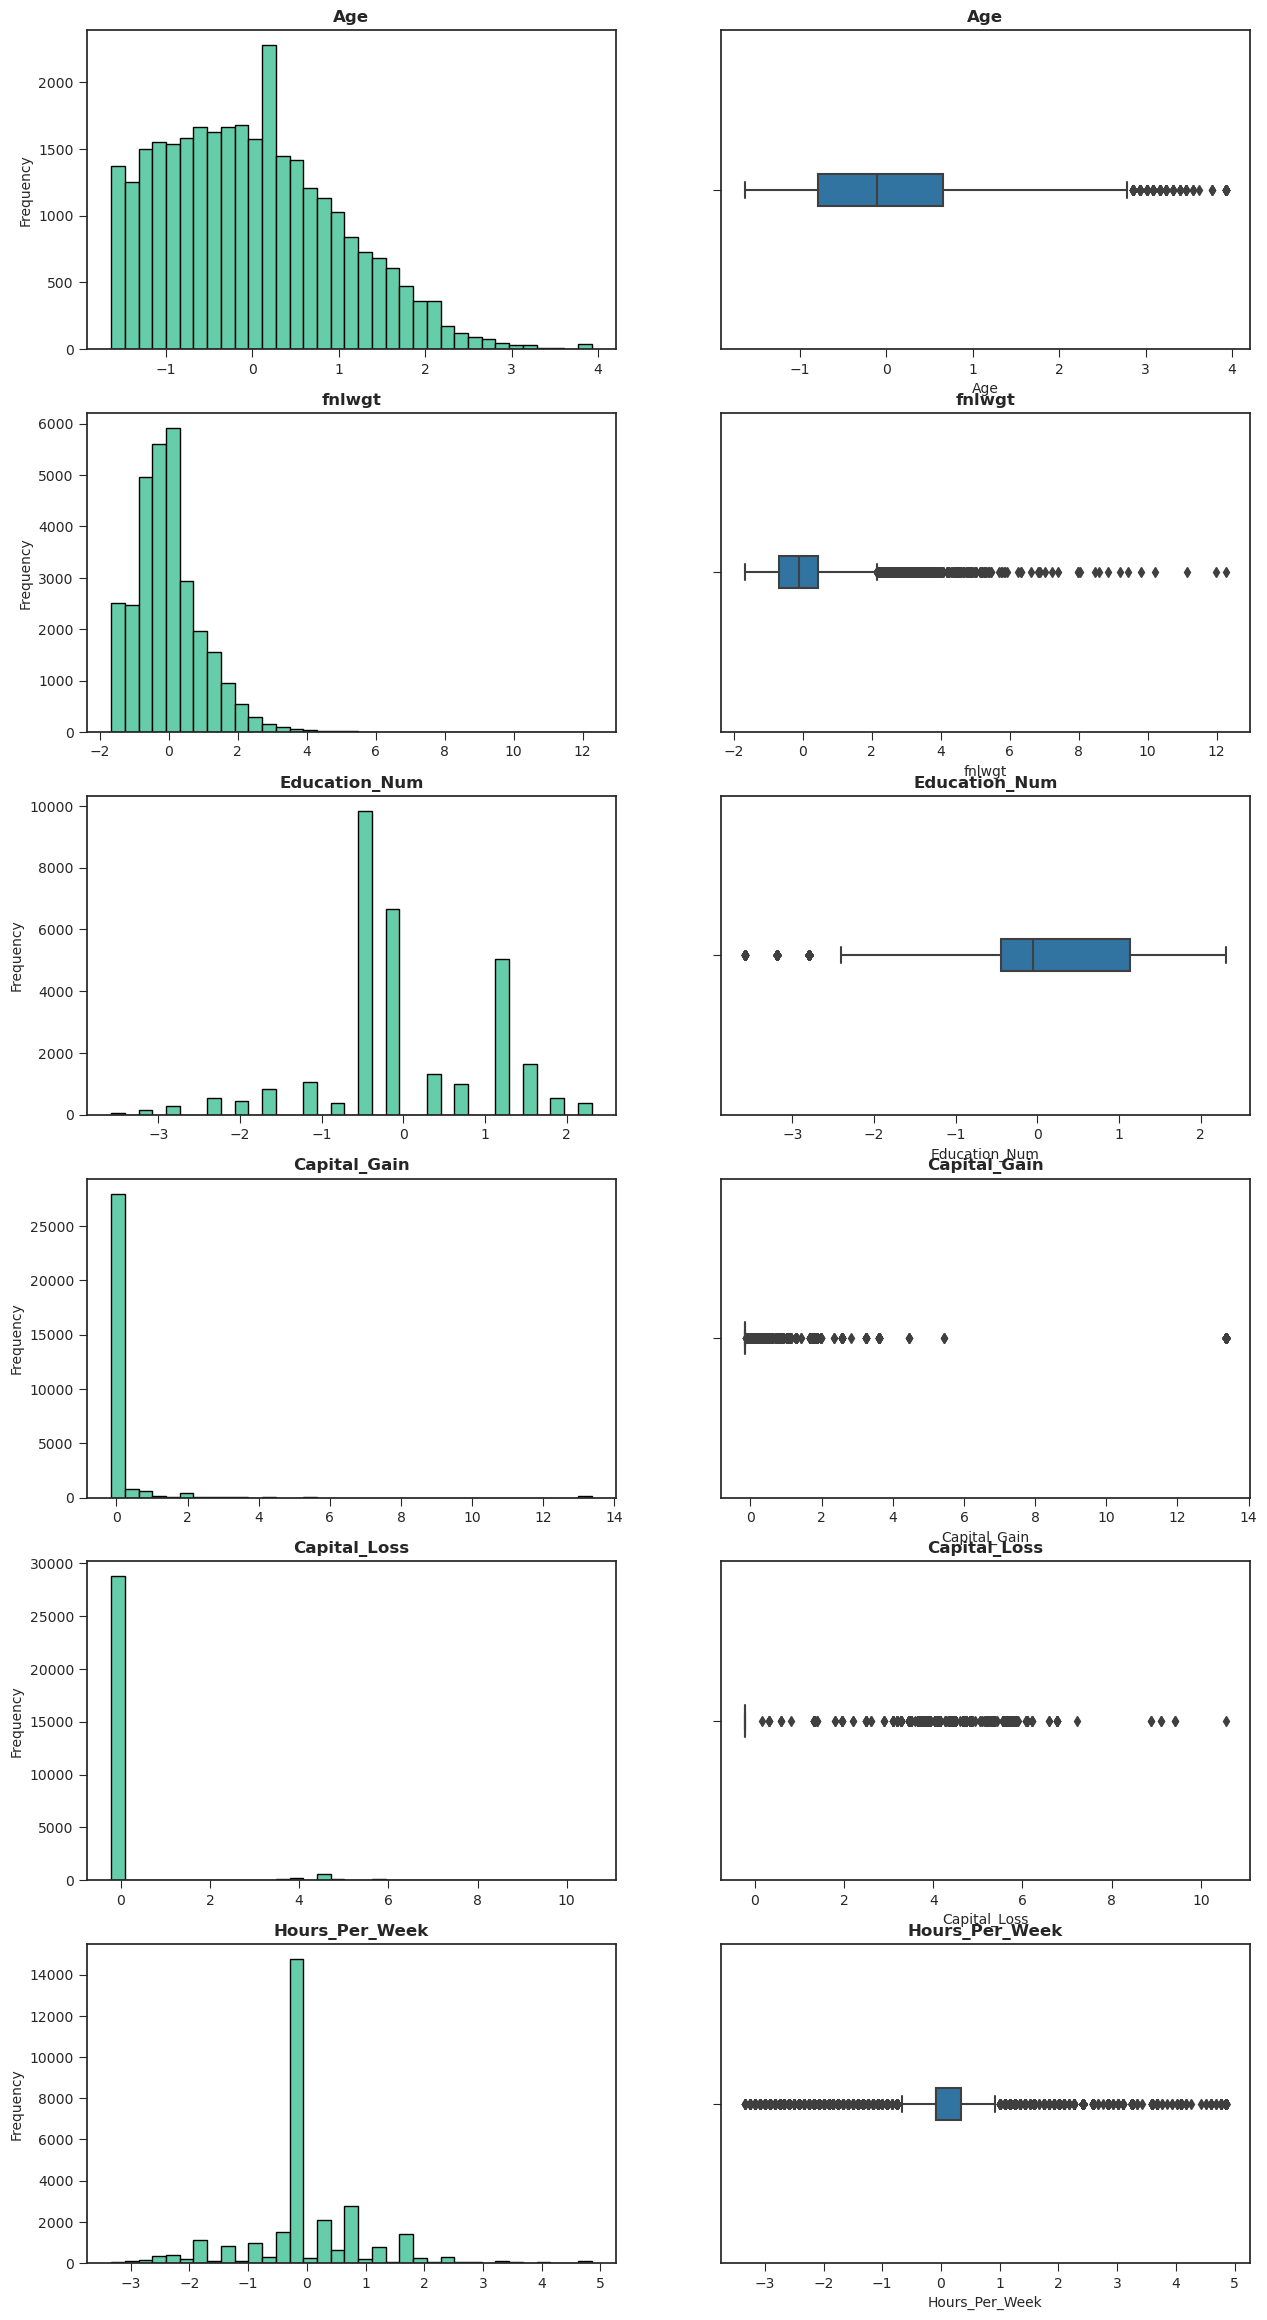

In [500]:
i=0
with plt.style.context(('seaborn-ticks')):
    fig, ax = plt.subplots(6,2, figsize= (15,29))
    for col in num_columns:
        ax[i][0].hist(outiler_df[col], bins=35, edgecolor= 'k', color= 'mediumaquamarine')
        ax[i][0].set_title(col, weight= 'bold')
        ax[i][0].set_ylabel("Frequency")
        
        ax[i][0]= sns.boxplot(x= outiler_df[col], data= outiler_df[col], width= 0.1, ax= ax[i][1], color= 'tab:blue')
        ax[i][0].set_title(col, weight= 'bold')
        i=i+1

### Looking at the graphs there doesn't seem like there are clear outliers as such, thus we don't remove any data.

### Feature Engineering-
- Firstly we careate a  new feature named `Net_Capital_Diff`= `Capital_Gain`-`Capital_Loss`
- Econdly, we log transform the feature `fnlwgt` to get rid of the skewewdness. Althogh the skewedness is gone but still it is not totally symmetrical.

Text(0, 0.5, 'Frequency')

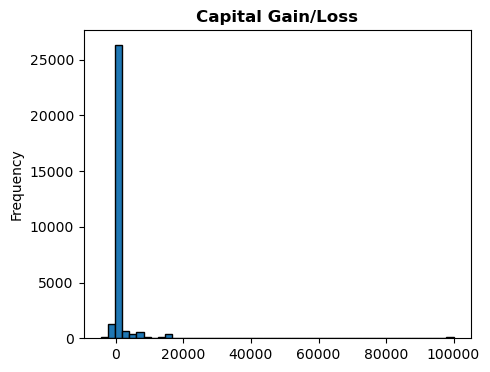

In [519]:
df_model['Net_Capital_Diff']= df_model['Capital_Gain']-df_model['Capital_Loss']
plt.figure(figsize=(5,4))
plt.hist(df_model['Net_Capital_Diff'], bins=50, edgecolor='k')
plt.title("Capital Gain/Loss",weight='bold')
plt.ylabel("Frequency")

In [521]:
df_model['log_fnlwgt']=np.log(df_model['fnlwgt'])

Text(0, 0.5, 'Frequency')

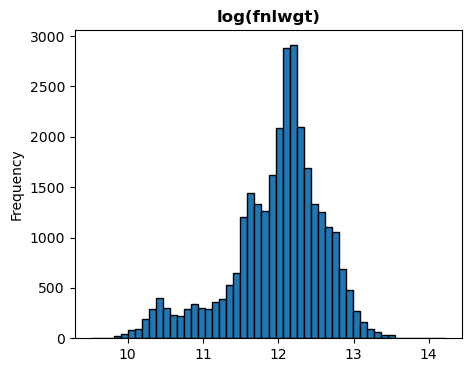

In [530]:
plt.figure(figsize=(5,4))
plt.hist(df_model['log_fnlwgt'], bins=50, edgecolor='k')
plt.title("log(fnlwgt)",weight='bold')
plt.ylabel("Frequency")

In [525]:
df_model = df_model.drop(columns=['Education','fnlwgt','Capital_Gain','Capital_Loss'], axis=1)

In [528]:
df_model.columns

Index(['Age', 'Workclass', 'Education_Num', 'Marital_Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Hours_Per_Week', 'Native_Country',
       '<=50K', 'Net_Capital_Diff', 'log_fnlwgt'],
      dtype='object')

In [574]:
ohe_columns= ['Workclass','Marital_Status','Occupation','Relationship','Race','Sex','Native_Country','<=50K']

df_model = pd.get_dummies(df_model, columns = ohe_columns, drop_first=True)
df_model['<=50K_ >50K'].head(7)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
Name: <=50K_ >50K, dtype: uint8

In [575]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 81 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         30161 non-null  int64  
 1   Education_Num                               30161 non-null  int64  
 2   Hours_Per_Week                              30161 non-null  int64  
 3   Net_Capital_Diff                            30161 non-null  int64  
 4   log_fnlwgt                                  30161 non-null  float64
 5   Workclass_ Local-gov                        30161 non-null  uint8  
 6   Workclass_ Private                          30161 non-null  uint8  
 7   Workclass_ Self-emp-inc                     30161 non-null  uint8  
 8   Workclass_ Self-emp-not-inc                 30161 non-null  uint8  
 9   Workclass_ State-gov                        30161 non-null  uint8  
 10  Workclass_

### Balancing the classes: 
We have seen that there is an imbanlance of outcomes in the output class, $24\%$ : $76\%$. For proper running of the model we would like it to balance into nearly $50\%$ : $50\%$

In [630]:
output_0= df_model[df_model['<=50K_ >50K']==0]
output_1= df_model[df_model['<=50K_ >50K']==1]

print(len(output_0),len(output_1))

22653 7508


In [631]:
from sklearn.utils import resample
output_0_downsample = resample(output_0,
             replace=True,
             n_samples=10000,
             random_state=42)

print(output_0_downsample.shape)

(10000, 81)


In [632]:
df_model = pd.concat([output_0_downsample, output_1])
print(df_model['<=50K_ >50K'].value_counts())

0    10000
1     7508
Name: <=50K_ >50K, dtype: int64


In [634]:
# Shape of downsaploed data
df_model.shape

(17508, 81)

In [643]:
7508/(7508+10000)

0.4288325336988805

# -------------------------------------------------------------------------------------------

# Modelling

## We will use the two models 1) Logistic Regression and 2) Random Forest

### We are going with these two model in particular because they can provide us with feature importances. We can thus check for feature importance of the column `Sex` to see if it's a important factor for determining $\$50K+$salary

In [679]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### Splitting data into 3 parts. Keeping 2,508 data points for testing; 12,000 for training and 3,000 for validation

In [635]:
df_model.shape

(17508, 81)

In [637]:
y_column=['<=50K_ >50K']
x_column= [colm for colm in df_model.columns if colm not in y_column]

print(len(x_column), len(y_column))
print(len(df_model.columns))

80 1
81


In [641]:
# Splitting data into test, train and validation sets
df_model= df_model.sample(frac = 1)     # Shuffling the data

df_test_x= df_model[x_column].iloc[15000:len(df_model)]
df_test_y= df_model[y_column].iloc[15000:len(df_model)]

df_train_x= df_model[x_column].iloc[:12000]
df_train_y= df_model[y_column].iloc[:12000]

df_valid_x= df_model[x_column].iloc[12000:15000]
df_valid_y= df_model[y_column].iloc[12000:15000]

print("Test:\t",df_test_x.shape,df_test_y.shape)
print("Validatn:\t",df_valid_x.shape,df_valid_y.shape)
print("Train:\t",df_train_x.shape,df_train_y.shape)

Test:	 (2508, 80) (2508, 1)
Validatn:	 (3000, 80) (3000, 1)
Train:	 (12000, 80) (12000, 1)


## 1) Logistic Regression
For Logistic Regression we are using the Regularized $L_2$ Loss function (Which is provided by default for sklearn logistic regression class). The goa is to minimize the Loss function.

$$ Loss_2 = \sum_i^n\big(y_i - \sum_j^p x_{ij}\beta_j\big)^2 + \lambda \sum_j^p \beta_j^2 $$

We will try to vary $\lambda$ and see how different models perform (It is set to 1 by default).

In [642]:
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(df_train_x, df_train_y)
y_vaild_pred = logreg.predict(df_valid_x)

print(classification_report(df_valid_y, y_vaild_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1732
           1       0.75      0.78      0.77      1268

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.79      3000
weighted avg       0.80      0.80      0.80      3000



/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [655]:
logreg = LogisticRegression(max_iter=2000, C=0.7)

# fit the model with data
logreg.fit(df_train_x, df_train_y)
y_vaild_pred = logreg.predict(df_valid_x)

print(classification_report(df_valid_y, y_vaild_pred))

/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1732
           1       0.76      0.79      0.77      1268

    accuracy                           0.81      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.81      0.81      0.81      3000



In [657]:
logreg = LogisticRegression(max_iter=4000, C=2)

# fit the model with data
logreg.fit(df_train_x, df_train_y)
y_vaild_pred = logreg.predict(df_valid_x)

print(classification_report(df_valid_y, y_vaild_pred))

/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1732
           1       0.76      0.79      0.78      1268

    accuracy                           0.81      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.81      0.81      0.81      3000



## Observations
- Running the Logistic Regression model gives us an accuracy of $80\%$ on validation set.
- I only made some changes on the regularization constant value, making them didn't affect the accuracy as such.
- So we will go with the $\lambda=1$ model

### Final Scores on Test set

/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1474
           1       0.76      0.80      0.78      1034

    accuracy                           0.82      2508
   macro avg       0.81      0.81      0.81      2508
weighted avg       0.82      0.82      0.82      2508



/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


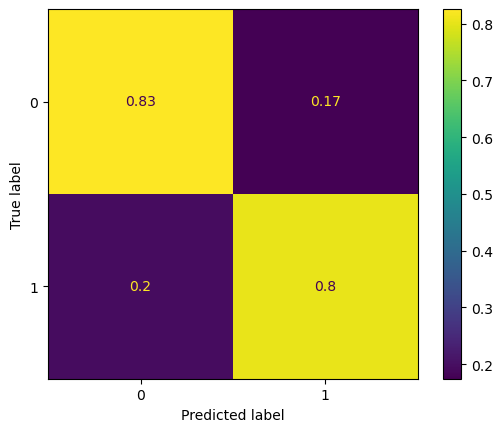

In [663]:
logreg = LogisticRegression(max_iter=4000, C=2)

# fit the model with data
logreg.fit(df_train_x, df_train_y)
y_test_pred = logreg.predict(df_test_x)

print(classification_report(df_test_y, y_test_pred))

#confusion_matrix(df_test_y, y_test_pred)
plot_confusion_matrix(logreg, df_test_x, df_test_y, normalize='true')

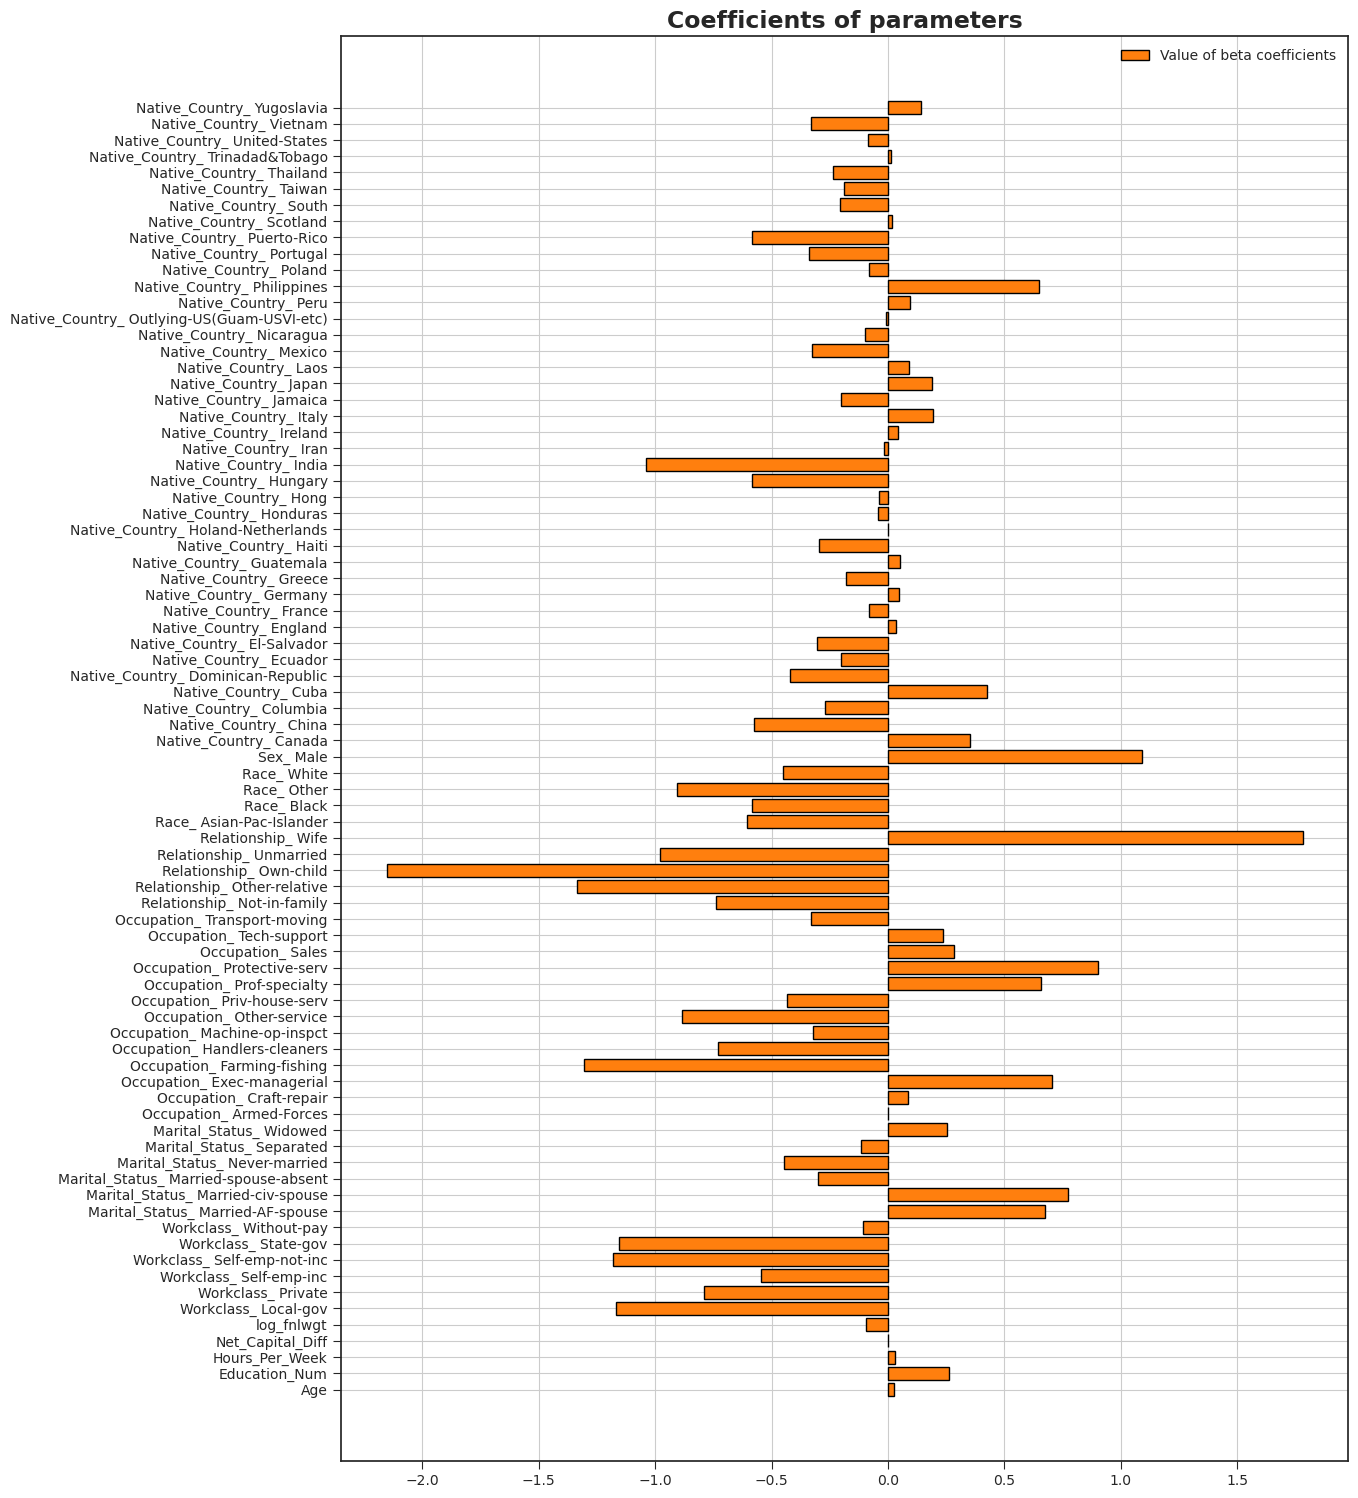

In [678]:
Coeffs= logreg.coef_
CoeffNames= logreg.feature_names_in_ 
intercept= logreg.intercept_

with plt.style.context(('seaborn-ticks')):
    plt.figure(figsize= (13,18.5))
    plt.barh(CoeffNames, Coeffs[0], height= 0.8, color= 'tab:orange', label= "Value of beta coefficients", edgecolor='k')
    plt.grid()
    plt.title("Coefficients of parameters", weight='bold', size= 17)
    plt.legend()

## 2) Random Forest
In Random Forest algorithm we create multiple bootstrap samples of the training data and on each bootstrap sample we choose m (<<p) features randomly and fit CART on it. When making prediction, we assign predicted value as the majority of the votes assigned to the data from each of the bootstrapped data.

In the case of bagged trees, the mean is same as the mean of the individual tree. The aim of Random Forest is to somehow reduce the variance.

#### Link- https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#varimp

In [680]:
randomforset= RandomForestClassifier()
randomforset.fit(df_train_x, df_train_y)
y_vaild_pred= randomforset.predict(df_valid_x) 
print(classification_report(df_valid_y, y_vaild_pred))

/var/folders/l0/8z1l6dz91hbbww5v8c6mnhfm0000gn/T/ipykernel_27233/2580284549.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforset.fit(df_train_x, df_train_y)


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1732
           1       0.83      0.82      0.82      1268

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



### Final Scores on Test set

/var/folders/l0/8z1l6dz91hbbww5v8c6mnhfm0000gn/T/ipykernel_27233/2314936190.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforset.fit(df_train_x, df_train_y)


              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1474
           1       0.82      0.82      0.82      1034

    accuracy                           0.85      2508
   macro avg       0.85      0.85      0.85      2508
weighted avg       0.85      0.85      0.85      2508



/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


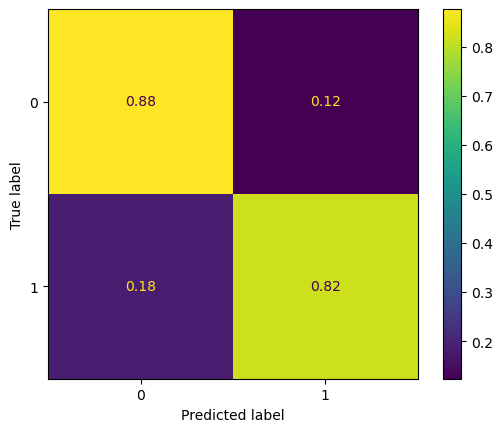

In [683]:
randomforset= RandomForestClassifier()
randomforset.fit(df_train_x, df_train_y)
y_test_pred= randomforset.predict(df_test_x) 
print(classification_report(df_test_y, y_test_pred))
plot_confusion_matrix(randomforset, df_test_x, df_test_y, normalize='true')

In [684]:
randomforset.feature_names_in_

array(['Age', 'Education_Num', 'Hours_Per_Week', 'Net_Capital_Diff',
       'log_fnlwgt', 'Workclass_ Local-gov', 'Workclass_ Private',
       'Workclass_ Self-emp-inc', 'Workclass_ Self-emp-not-inc',
       'Workclass_ State-gov', 'Workclass_ Without-pay',
       'Marital_Status_ Married-AF-spouse',
       'Marital_Status_ Married-civ-spouse',
       'Marital_Status_ Married-spouse-absent',
       'Marital_Status_ Never-married', 'Marital_Status_ Separated',
       'Marital_Status_ Widowed', 'Occupation_ Armed-Forces',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Farming-fishing', 'Occupation_ Handlers-cleaners',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Priv-house-serv', 'Occupation_ Prof-specialty',
       'Occupation_ Protective-serv', 'Occupation_ Sales',
       'Occupation_ Tech-support', 'Occupation_ Transport-moving',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
    

In [686]:
randomforset.feature_importances_

0.1524013716792694

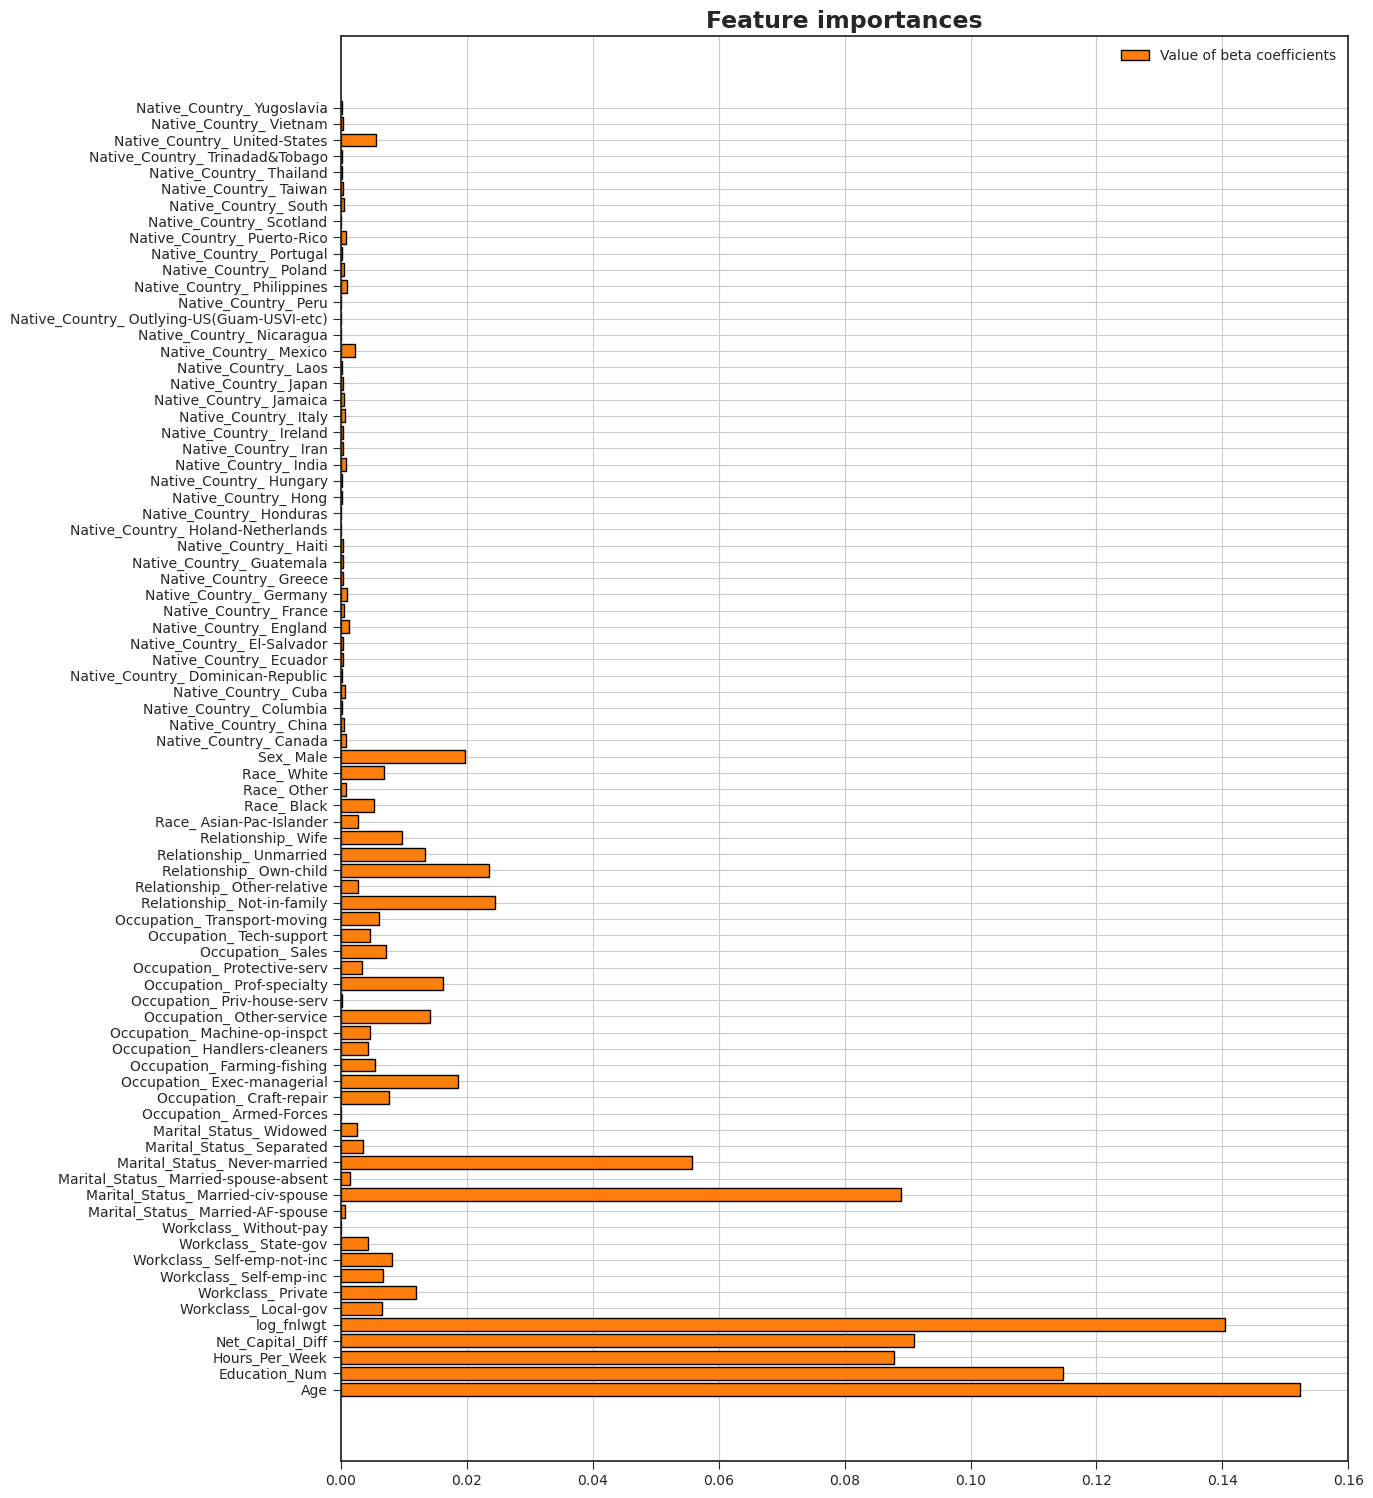

In [690]:
CoeffNames= randomforset.feature_names_in_
Coeffs= randomforset.feature_importances_


with plt.style.context(('seaborn-ticks')):
    plt.figure(figsize= (13,18.5))
    plt.barh(CoeffNames, Coeffs, height= 0.8, color= 'tab:orange', label= "Value of beta coefficients", edgecolor='k')
    plt.grid()
    plt.title("Feature importances", weight='bold', size= 17)
    plt.legend()

# Final Conclusions
- The accuracy score of Logistic Regression on the test dataset is ~$80\%$, compared to it Random Forest performs better with ~$85\%$ accuracy score.
- Also the feature importances assigned by Random Forest makes much more sense than Logistic Regressions ones. It alligns with the observations we have made during the Data Analysis. 
- We have seen during the Data Analysis that Age and Education Level clearly plays an important role in determining a persons yealy salary. But Logistic Regression assigns very low feature importance to both of them.
- On the other side Random Forest assigns high importance to both the features, being in agreement with our observations.
- **We can say that Random Forest encapsulates the Dataset faily well.**

## The most important factors for determining whether a person earns $\$50K+$ salary, according to Random Forest are (In order)-

### 1. Age of the person

### 2. fnlwht

### 3. Education Level

### 4.  Net capital difference

### 5.  Number of working hours 

# Did we find any evidence of sexism in the US workforce?
- Initially looking at the bivariate plot of `sex` and `<=50K` it looks that there is a clear discrepancy of earnings between Males and Females.
- There can multiple reasons fot it. One of them we have seen is that men are mostly highly densely populated in jobs which pay higher.
- If there is a high feature importance for `sex` column from the predictive model, we might say that indicates unjust assigniment of pay between men and women (As the model takes into consideration all the features at the same time while deciding the importance).
- But from the graph of the feature importance of `sex` by Random Forest, it can be seen the value is close to 0. This shows that the model thinks that it is not an important determining factor in itself.
- That is not to say that gender doesn't influence other factors (like occupation or education or other) which then directly infuence the determination of high salary. 
-**So as per this anaysis we conclude that sex itself is not a determination factor for high salary, but it affects other factors which directly influence the determination of high salary.**